<a href="https://colab.research.google.com/github/srm04072024/24240003/blob/main/Copy_of_Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
air = pd.read_csv('/content/sample_data/DDoS_dataset.csv')
df = air.copy()
df.head()

,Highest Layer,Transport Layer,Source IP,Dest IP,Source Port,Dest Port,Packet Length,Packets/Time,target
0,ARP,UDP,1,192.168.1.1,0.0,0.0,60.0,92.8,1.0
1,ARP,UDP,0,192.168.1.10,0.0,0.0,42.0,92.9,0.0
2,ARP,UDP,1,192.168.1.1,0.0,0.0,60.0,362.8,1.0
3,ARP,UDP,0,192.168.1.12,0.0,0.0,42.0,362.8,0.0
4,ARP,UDP,1,192.168.1.1,0.0,0.0,60.0,364.3,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25709 entries, 0 to 25708
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Highest Layer    25709 non-null  object 
 1   Transport Layer  25709 non-null  object 
 2   Source IP        25709 non-null  int64  
 3   Dest IP          25709 non-null  object 
 4   Source Port      25708 non-null  float64
 5   Dest Port        25708 non-null  float64
 6   Packet Length    25708 non-null  float64
 7   Packets/Time     25708 non-null  float64
 8   target           25708 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 1.8+ MB


In [ ]:
df.shape

(25709, 9)

In [ ]:
df.isnull().sum()

,0
Highest Layer,0
Transport Layer,0
Source IP,0
Dest IP,0
Source Port,1
Dest Port,1
Packet Length,1
Packets/Time,1
target,1


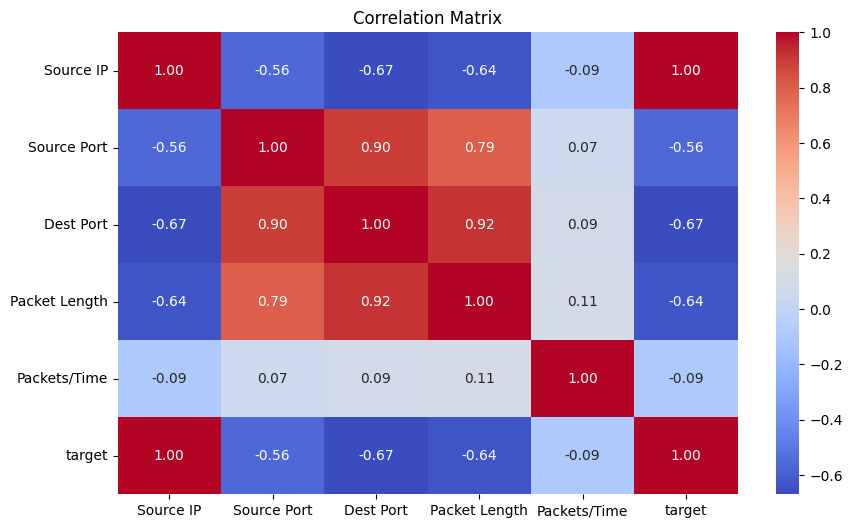

In [ ]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

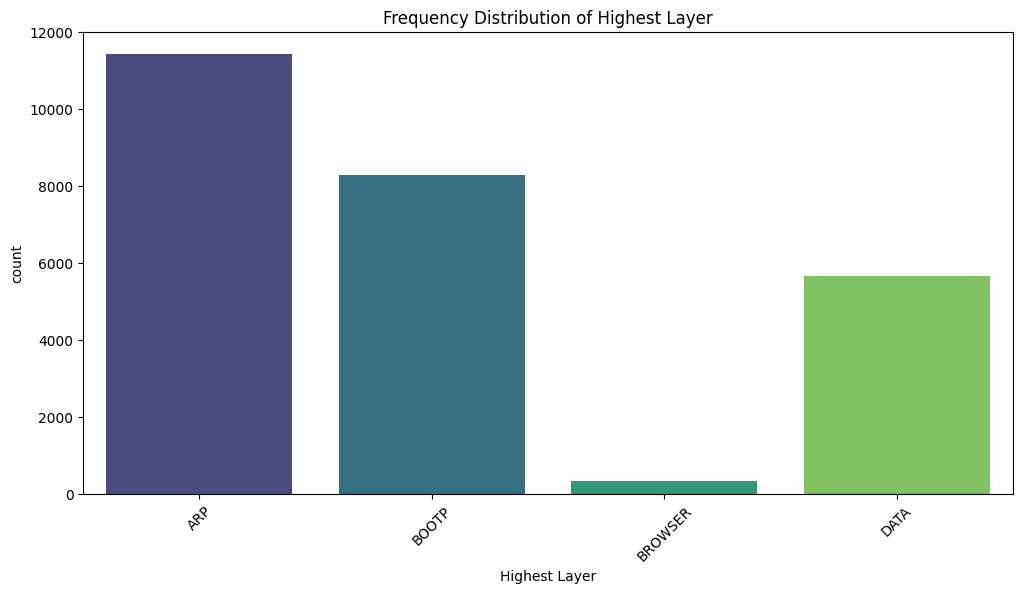

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Highest Layer', data=df, palette='viridis')
plt.title('Frequency Distribution of Highest Layer')
plt.xticks(rotation=45)
plt.show()

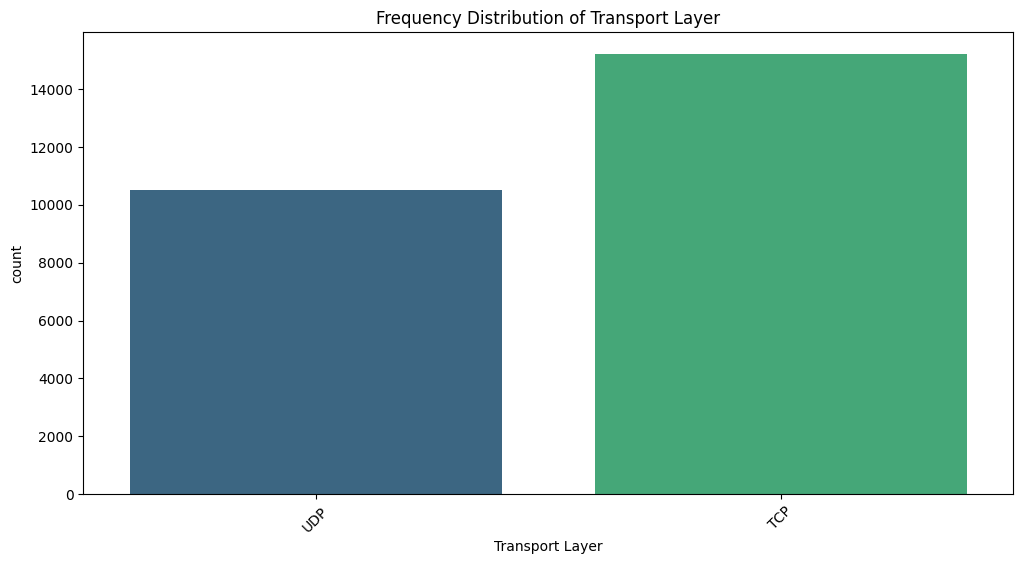

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Transport Layer', data=df, palette='viridis')
plt.title('Frequency Distribution of Transport Layer')
plt.xticks(rotation=45)
plt.show()

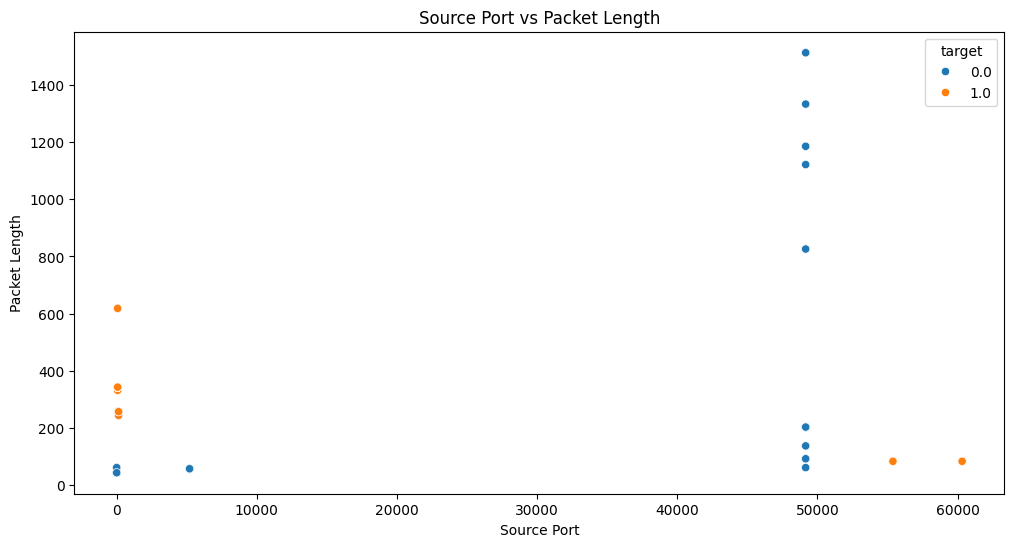

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Source Port', y='Packet Length', data=df, hue='target')
plt.title('Source Port vs Packet Length')
plt.show()

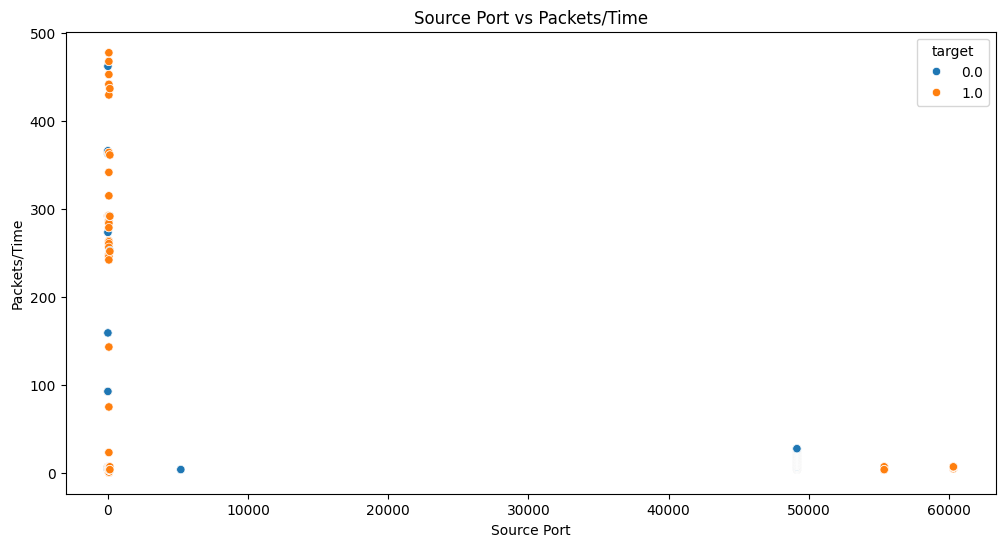

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Source Port', y='Packets/Time', data=df, hue='target')
plt.title('Source Port vs Packets/Time')
plt.show()

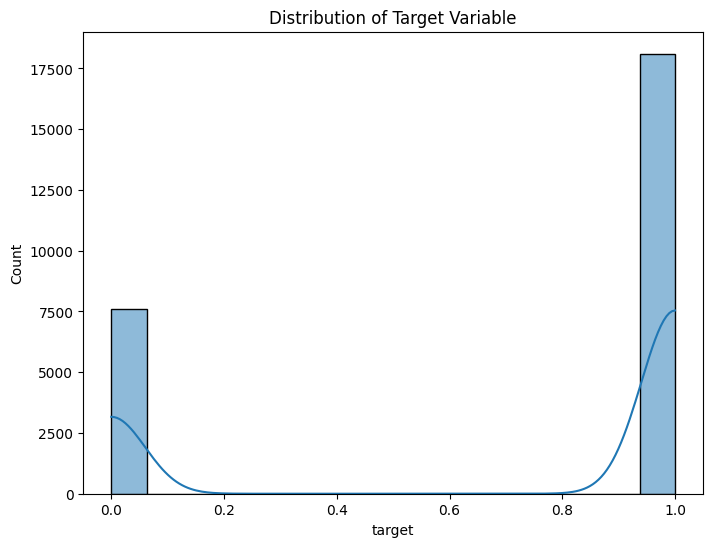

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True)
plt.title('Distribution of Target Variable')
plt.show()

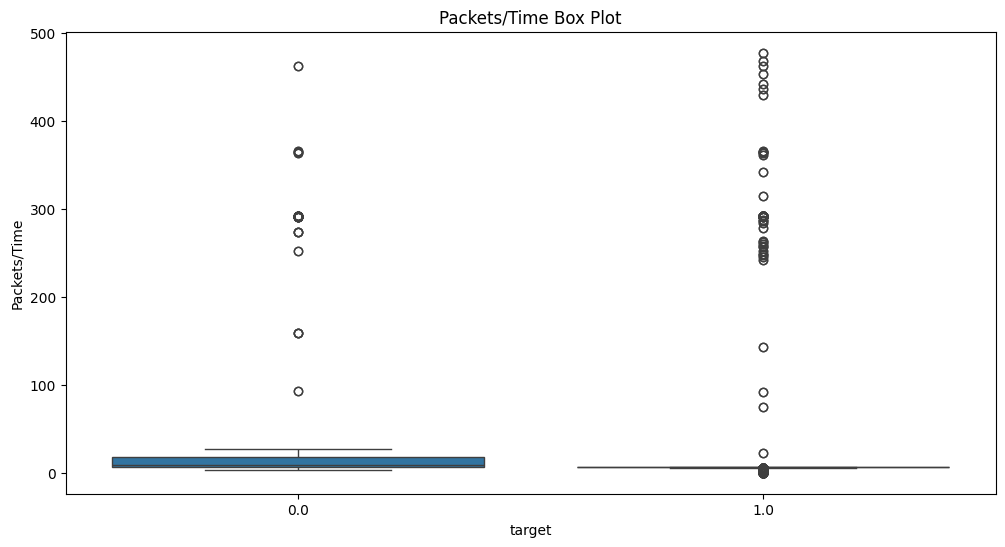

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='Packets/Time', data=df)
plt.title('Packets/Time Box Plot')
plt.show()

In [ ]:
df = df.drop(columns=['Dest IP'])

In [ ]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target',axis = 1)
y = df['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(20567, 7) (5142, 7)


In [ ]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
X.dropna(inplace=True)  # Remove rows with NaN values in X
y = y[X.index]  # Update y to match the remaining rows in X

In [ ]:
loj = LogisticRegression(solver = 'liblinear')
loj_model = loj.fit(X, y)

In [ ]:
y_pred = loj_model.predict(X)
lr_accuracy = accuracy_score(y, y_pred)
lr_accuracy

0.8833048078419169

In [ ]:
lr_accuracy  *= 100

In [ ]:
lr_accuracy

88.33048078419169